# Proyecto: Análisis de mercado inmobiliario 


Este proyecto corresponde a la primera entrega para aprobar el curso intensivo de Data Science en Acámica. La finalidad de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:

* Parte 1: se presenta la problemática y el objetivo sobre el que se va a trabajar. En esta sección se pensará qué datos ayudarán a resolver este problema.
* Parte 2: se realizará un Análisis Exploratorio de Datos utilizando el dataset de la empresa [Properati](www.properati.com.ar), el cual puede ser descargado del siguiente [link](https://drive.google.com/uc?export=download&id=1Ugbsw5XbNRbglomSQO1qkAgMFB_3BzmB). 
* Parte 3: se creará un modelo de Machine Learning para predecir la variable de interés.


## Parte 1: Planteamiento del problema

### Objetivo: 

Ayudar a los tasadores/as a valuar las propiedades, a través de un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

Teniendo en cuenta las características particulares del negocio inmobiliario y los elementos que habitualmente influyen en la determinación de los precios de venta, considero que en su orden, los siguientes datos son escenciales para resolver la problemática planteada:

1. Ubicación del inmueble (zona y barrio)
1. Estrato o nivel socio-económico
1. Tipo de inmueble (apto, casa, apartaestudio, etc.)
1. Área del inmueble en metros cuadrados
1. Antiguedad del inmueble
1. En caso de tratarse de apartamentos en qué piso se encuentra y si cuenta con ascensores
1. Número de habitaciones, baños y estacionamientos
1. Si el inmueble se encuentra dentro de un conjunto cerrado o no y si tiene vigilancia privada
1. Con qué zonas comunes cuenta el inmueble (gimnasio, salones, piscina, juegos, etc.)
1. Facilidades en el entorno (cercanía al transporte masivo, centros médicos, centros comerciales, escuelas, etc.)

## Parte 2: Análisis Exploratorio de Datos

En esta sección, se realizará un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Se buscará responder durante el análisis las siguientes preguntas:

* ¿Qué tamaño tiene el dataset? ¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable?
* ¿Cómo se relacionan las variables entre sí?
* ¿Cómo están correlacionadas las variables numéricas? ¿Cuáles serán los mejores predictores de la variable de interés?

**Comentarios sobre el dataset** 

1. Para más información sobre las variables del dataset se puede consultar [aquí](https://www.properati.com.ar/data/).

2. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.

0. Importa las librerías necesarias para trabajar en la consigna.

In [23]:
# Se importan las librerías que se van a utilizar:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [24]:
# Se carga el dataset y se imprimen las primeras 5 instancias:

data = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
properati = pd.DataFrame(data)
properati.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [25]:
# Se imprime la forma del DataFrame para conocer su número de filas y columnas:

print("Total Filas y Columnas")
print(properati.shape)

Total Filas y Columnas
(146660, 19)


**2. Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [26]:
print("Total Valores Faltantes por Columna")
print(properati.isna().sum())

Total Valores Faltantes por Columna
start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


**3. Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset? ¿Cuántos instancias por cada tipo de propiedad hay en el dataset?

* A continuación se incluyen una tabla con su respectiva gráfica de los tipos de propiedad existentes y las instancias para cada una de ellas:

In [27]:
# Número de publicaciones por tipo de propiedad

tipo_propiedad = pd.DataFrame(properati.groupby(["property_type"], sort=True)["property_type"].count()
                              .reset_index(name="total"))
tipo_propiedad

,property_type,total
0,Casa,21521
1,Casa de campo,322
2,Cochera,259
3,Departamento,107326
4,Depósito,265
5,Local comercial,325
6,Lote,1312
7,Oficina,658
8,Otro,374
9,PH,14298


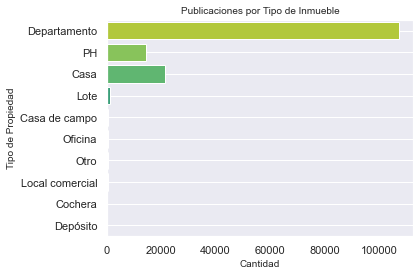

In [28]:
sns.set()

sns.countplot(data = properati, y= "property_type", palette="viridis_r")
plt.title('Publicaciones por Tipo de Inmueble', fontsize=10)
plt.ylabel('Tipo de Propiedad', fontsize=10)
plt.xlabel('Cantidad', fontsize=10)

plt.grid()
plt.tight_layout()
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`.

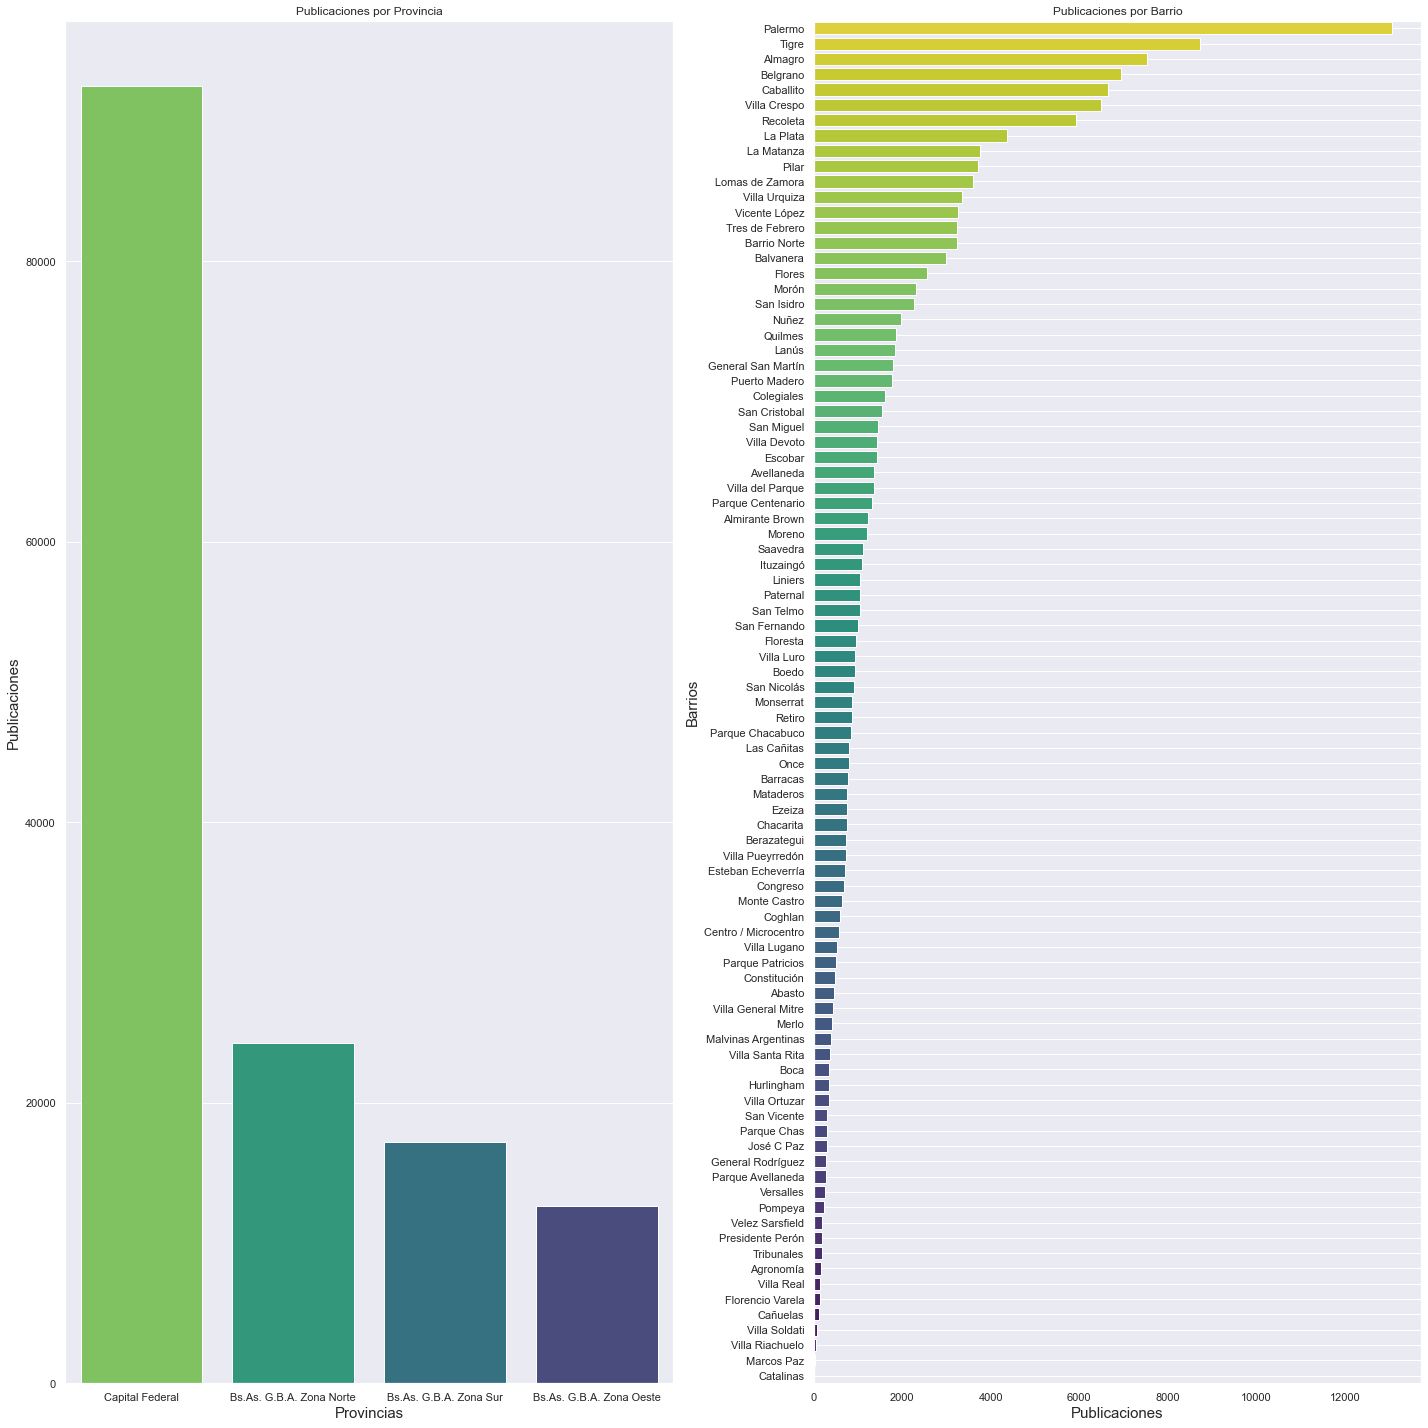

In [166]:
# Se realizan dos gráficos para visualizar las publicaciones por provincia y las publicaciones por barrio

sns.set()
fig, ax= plt.subplots(1,2)

sns.countplot(ax=ax[0], data = properati, x= "l2", order = properati["l2"].value_counts().index, palette="viridis_r")
ax[0].title.set_text('Publicaciones por Provincia')
ax[0].set_ylabel('Publicaciones', fontsize=15)
ax[0].set_xlabel('Provincias', fontsize=15)

sns.countplot(ax=ax[1], data = properati, y= "l3", order = properati["l3"].value_counts().index, palette="viridis_r")
ax[1].title.set_text('Publicaciones por Barrio')
ax[1].set_ylabel('Barrios', fontsize=15)
ax[1].set_xlabel('Publicaciones', fontsize=15)

fig.set_size_inches(20,20)
plt.grid()
plt.tight_layout()
plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., se seleccionan las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Se crea un nuevo DataFrame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

**Solución:**

* De acuerdo a los gráficos anteriores se puede observar que definitivamente la Región o Provincia con más publicaciones y por lejos (más de 90.000 publicaciones), es Capital Federal y que los tres tipos de propiedad con más publicaciones son en su orden: Departamentos, Casas y PH. Con base en ello, se hace la respectiva depuración del dataset como sigue:

In [167]:
s = properati[(properati.l2 == 'Capital Federal') & (properati.property_type.isin(['Departamento','Casa','PH']))]

print("*** Nuevo DataFrame ***")
print(s)

print("*** El Tamaño del DataFrame es: ***")
print(s.shape)

print("*** Tipo y Clase ***")
print(type(s))

*** Nuevo DataFrame ***
        start_date    end_date  created_on        lat        lon         l1  \
0       2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1       2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2       2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3       2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
5       2019-10-17  2019-11-01  2019-10-17 -34.593779 -58.441239  Argentina   
...            ...         ...         ...        ...        ...        ...   
146554  2019-07-31  2019-08-14  2019-07-31 -34.585355 -58.427194  Argentina   
146555  2019-07-31  2019-08-14  2019-07-31 -34.585355 -58.427194  Argentina   
146556  2019-07-31  2020-01-17  2019-07-31 -34.584134 -58.436389  Argentina   
146557  2019-07-31  2019-08-23  2019-07-31 -34.583995 -58.417645  Argentina   
146558  2019-07-31  2020-01-17  2019-07-31        NaN        NaN  Argentina   

                     l2    

**Checkpoint:** debería tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

### Solución Punto 6

### Punto A.

Se utiliza la función `.describe` para calcular diferentes indicadores estadísticos que nos permitan tener una primera idea del dataset:

In [168]:
s.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


#### Análisis Preliminar del dataset

Algunos de los datos resultantes no son tan coherentes como se esperaban, ya que se salen de los parámetros estándar para este tipo de propiedades, por ejemplo:

1. Inmuebles con superficie total 126.062 metros cuadrados 
1. Inmuebles con 14 baños
1. Inmuebles con 0 (cero) habitaciones (bedrooms)
1. Inmuebles con 26 ambientes (rooms)

### Puntos B, C, D y E. 

**Análisis Boxplot Preliminar: Distribución Área total y Precio**

Antes de empezar el análisis de distribución realizamos dos boxplot sin realizar ningún tipo de filtro, con el fin de mostrar cómo se ven los gráficos antes de descartar los valores extremos:

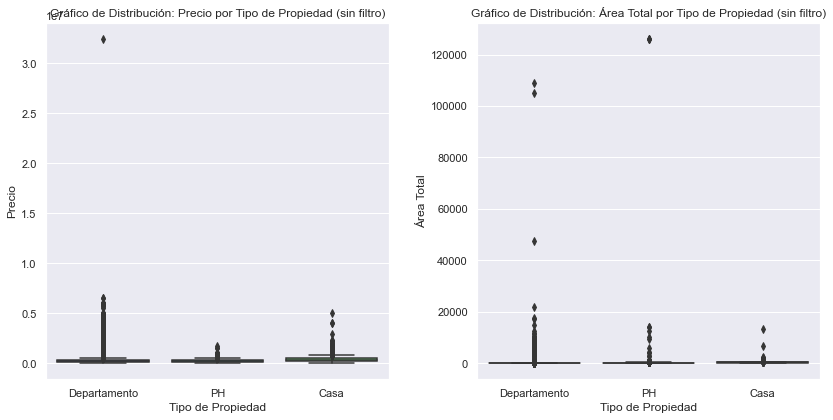

In [169]:
sns.set()
fig, ax= plt.subplots(1,2)

sns.boxplot(data=s, x='property_type', y='price', palette="viridis", ax=ax[0])
ax[0].title.set_text('Gráfico de Distribución: Precio por Tipo de Propiedad (sin filtro)')
ax[0].set_ylabel('Precio')
ax[0].set_xlabel('Tipo de Propiedad')

sns.boxplot(data=s, x='property_type', y='surface_total', palette="viridis", ax=ax[1])
ax[1].title.set_text('Gráfico de Distribución: Área Total por Tipo de Propiedad (sin filtro)')
ax[1].set_ylabel('Área Total')
ax[1].set_xlabel('Tipo de Propiedad')

fig.set_size_inches(12,6)
plt.tight_layout()
plt.show()

**Conclusión Preliminar:**

Como resultado de las gráficas se observó que efectivamente existen valores extremos, en apariencia sin mucho sentido, razón por la cual se realizará un boxplot con un rango más razonable.

#### Análisis distribución Área Total y Precio

1. Se realizan dos filtros: el primero para la variable `"área total"` entre 100 y 200 metros y el segundo, para la variable `"precio"` entre USD 100.000 y USD 500.000, con el objetivo de visualizar la distribución de dichas variables según el tipo de inmueble.

In [170]:
# Se hace filtro teniendo en cuenta los parámetros ya mencionados

graficas= s[(s["surface_total"]>=100) & (s["surface_total"]<= 200)&(s["price"]>=100000)&
            (s["price"]<=500000)]

print("Tamaño del dataset resultante:", graficas.shape)

Tamaño del dataset resultante: (15311, 19)


Text(0.5, 0, 'Tipo de Propiedad')

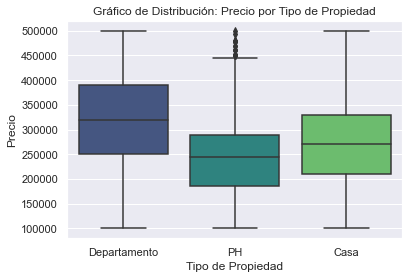

In [171]:
# Se realiza el gráfico de distribución del precio por tipo de propiedad

sns.set()
sns.boxplot(data=graficas, x='property_type', y='price', palette="viridis")
plt.title('Gráfico de Distribución: Precio por Tipo de Propiedad')
plt.ylabel('Precio')
plt.xlabel('Tipo de Propiedad')

Text(0.5, 0, 'Tipo de Propiedad')

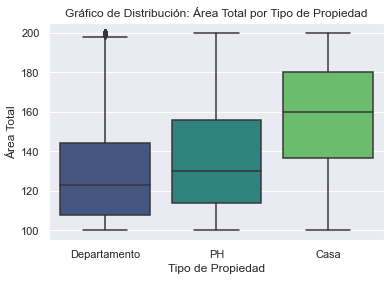

In [172]:
# Se realiza el gráfico de distribución del área por tipo de propiedad

sns.set()
sns.boxplot(data=graficas, x='property_type', y='surface_total', palette="viridis")
plt.title('Gráfico de Distribución: Área Total por Tipo de Propiedad')
plt.ylabel('Área Total')
plt.xlabel('Tipo de Propiedad')

2. En el siguiente código se efectúa una verificación para descartar aquellas propiedades en donde el `área construida` es mayor al `área total`.

In [173]:
# Se verifica cuántos inmuebles presentan esta inconsistencia:

inc = graficas.shape[0]-sum(graficas["surface_total"]>graficas["surface_covered"])
print("Total inmuebles con inconsistencia:", inc)

Total inmuebles con inconsistencia: 3913


In [174]:
# Se descartan aquellas propiedades con inconsistencia:

graficas2 = graficas[graficas["surface_total"] > graficas["surface_covered"]]

In [175]:
# Se Verifica si realmente se eliminaron las propiedades con inconsistencia: 

sin_inc = graficas2.shape[0]- sum(graficas2["surface_total"]>graficas2["surface_covered"])
print("Total inmuebles con inconsistencia:", sin_inc)

Total inmuebles con inconsistencia: 0


In [176]:
print("Tamaño del nuevo dataset sin inconsistencias:", graficas2.shape)

Tamaño del nuevo dataset sin inconsistencias: (11398, 19)


3. Una vez hecha la depuración en la que se eliminan las inconsistencias, se realizan nuevamente los gráficos de distribución, con el fin de compararlos con los anteriores.

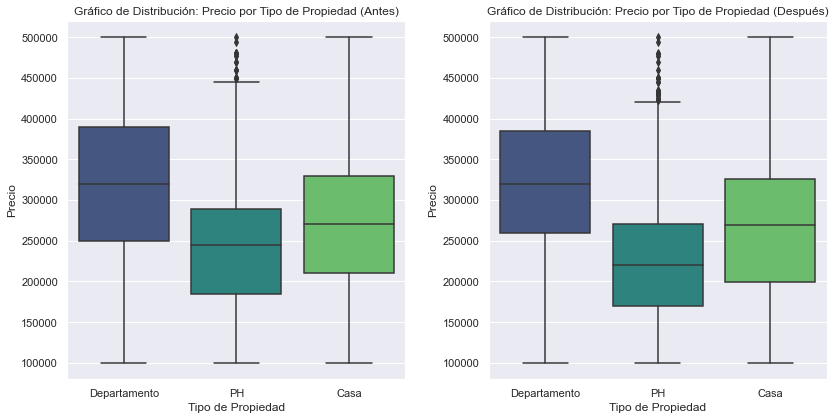

In [177]:
# Realizamos gráfico de distribución del precio por tipo de propiedad, antes y despúes de eliminar incosistencias

sns.set()
fig, ax= plt.subplots(1,2)

sns.boxplot(data=graficas, x='property_type', y='price', palette="viridis", ax=ax[0])
ax[0].title.set_text('Gráfico de Distribución: Precio por Tipo de Propiedad (Antes)')
ax[0].set_ylabel('Precio')
ax[0].set_xlabel('Tipo de Propiedad')

sns.boxplot(data=graficas2, x='property_type', y='price', palette="viridis", ax=ax[1])
ax[1].title.set_text('Gráfico de Distribución: Precio por Tipo de Propiedad (Después)')
ax[1].set_ylabel('Precio')
ax[1].set_xlabel('Tipo de Propiedad')

fig.set_size_inches(12,6)
plt.tight_layout()
plt.show()

**Conclusión:**

En primer lugar las gráficas no cambian mucho después de corregir las inconsistencias, lo que significa que éstas no tenían un impacto significativo. Adicionalmente, se puede observar que los inmuebles con un rango de precio promedio más alto son los Departamentos, los cuales se concentran en rangos entre aprox. USD 250.000 y USD 390.000, mientras que los inmuebles con un rango de precio promedio más bajo son los PH, los cuales se concentran en rangos entre aprox. entre USD 165.000 y USD 265.000. 

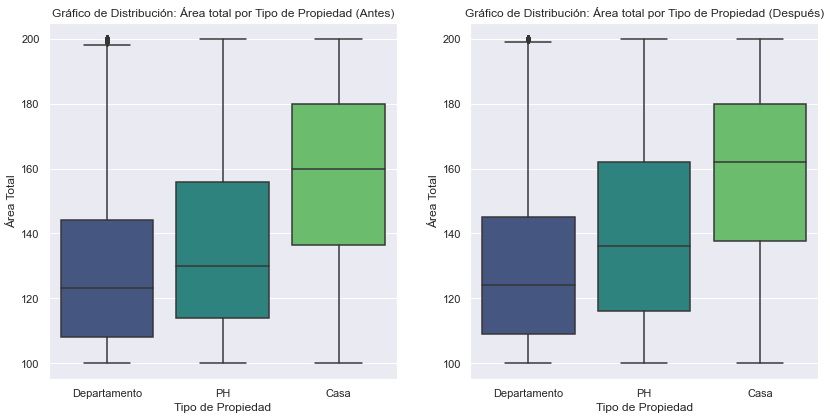

In [178]:
# Realizamos gráfico de distribución del área por tipo de propiedad, antes y después de eliminar inconsistencias

sns.set()
fig, ax= plt.subplots(1,2)

sns.boxplot(data=graficas, x='property_type', y='surface_total', palette="viridis", ax=ax[0])
ax[0].title.set_text('Gráfico de Distribución: Área total por Tipo de Propiedad (Antes)')
ax[0].set_ylabel('Área Total')
ax[0].set_xlabel('Tipo de Propiedad')

sns.boxplot(data=graficas2, x='property_type', y='surface_total', palette="viridis", ax=ax[1])
ax[1].title.set_text('Gráfico de Distribución: Área total por Tipo de Propiedad (Después)')
ax[1].set_ylabel('Área Total')
ax[1].set_xlabel('Tipo de Propiedad')

fig.set_size_inches(12,6)
plt.tight_layout()
plt.show()

**Conclusión:**

En primer lugar las gráficas no cambian mucho después de corregir las inconsistencias, lo que significa que éstas no tenían un impacto significativo. Adicionalmente, se puede observar que los inmuebles con un rango de área total promedio más alta son las Casas, las cuales se concentran en rangos entre aprox. 138 mts2 y 180 mts2, mientras que los inmuebles con un rango de área total promedio más baja son los Departamentos, los cuales se concentran en rangos entre aprox. 114 mts2 y 143 mts2. 

#### Análisis de relaciones entre variables y el precio

Por otro lado, se vió la necesidad de conocer la relación del `precio` con algunas variables como `rooms`, `bedrooms` y `bathrooms`, para lo cual se almacenarán los nombres de estas variables en una lista llamada "numericas", se realiza un ciclo `for` y se harán los gráficos de caja para ver su distribución.

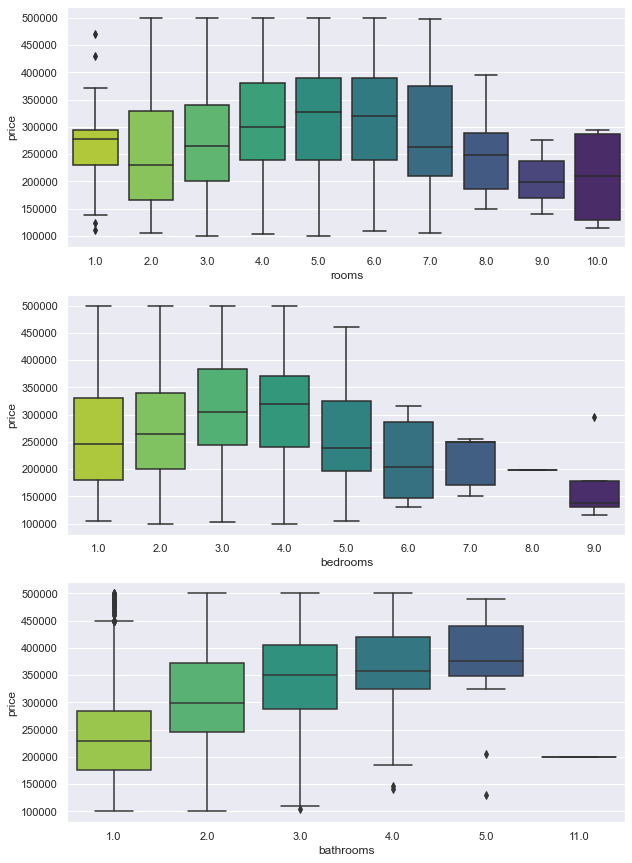

In [179]:
numericas=["rooms", "bedrooms", "bathrooms"]
fig, ax = plt.subplots(3, figsize=(10, 15))
for var, subplot in zip(numericas, ax.flatten()):
    sns.boxplot(x=var, y='price', data=graficas2, palette="viridis_r", ax=subplot)

**Conclusión:**

Las gráficas muestran unos resultados interesantes: en primer lugar se puede observar que el precio se afecta de manera importante en función de la cantidad de ambientes (rooms) que tenga el inmueble; en segundo lugar se observa que el precio no se afecta de manera importante en función de la cantidad de habitaciones (bedrooms), ya que si bien los precios aumentan levemente hasta los 3-4 habitaciones, dicho aumento no es relevante; en tercer lugar se observa que la cantidad de baños (bathrooms) sí tiene un impacto importante en el precio y dicho impacto es progresivo en la medida en que aumenta la cantidad de baños que tenga el inmueble.

### Punto F.

Finalmente, se utiliza la función `pairplot` de Seaborn para trazar las relaciones por pares del conjunto de datos.

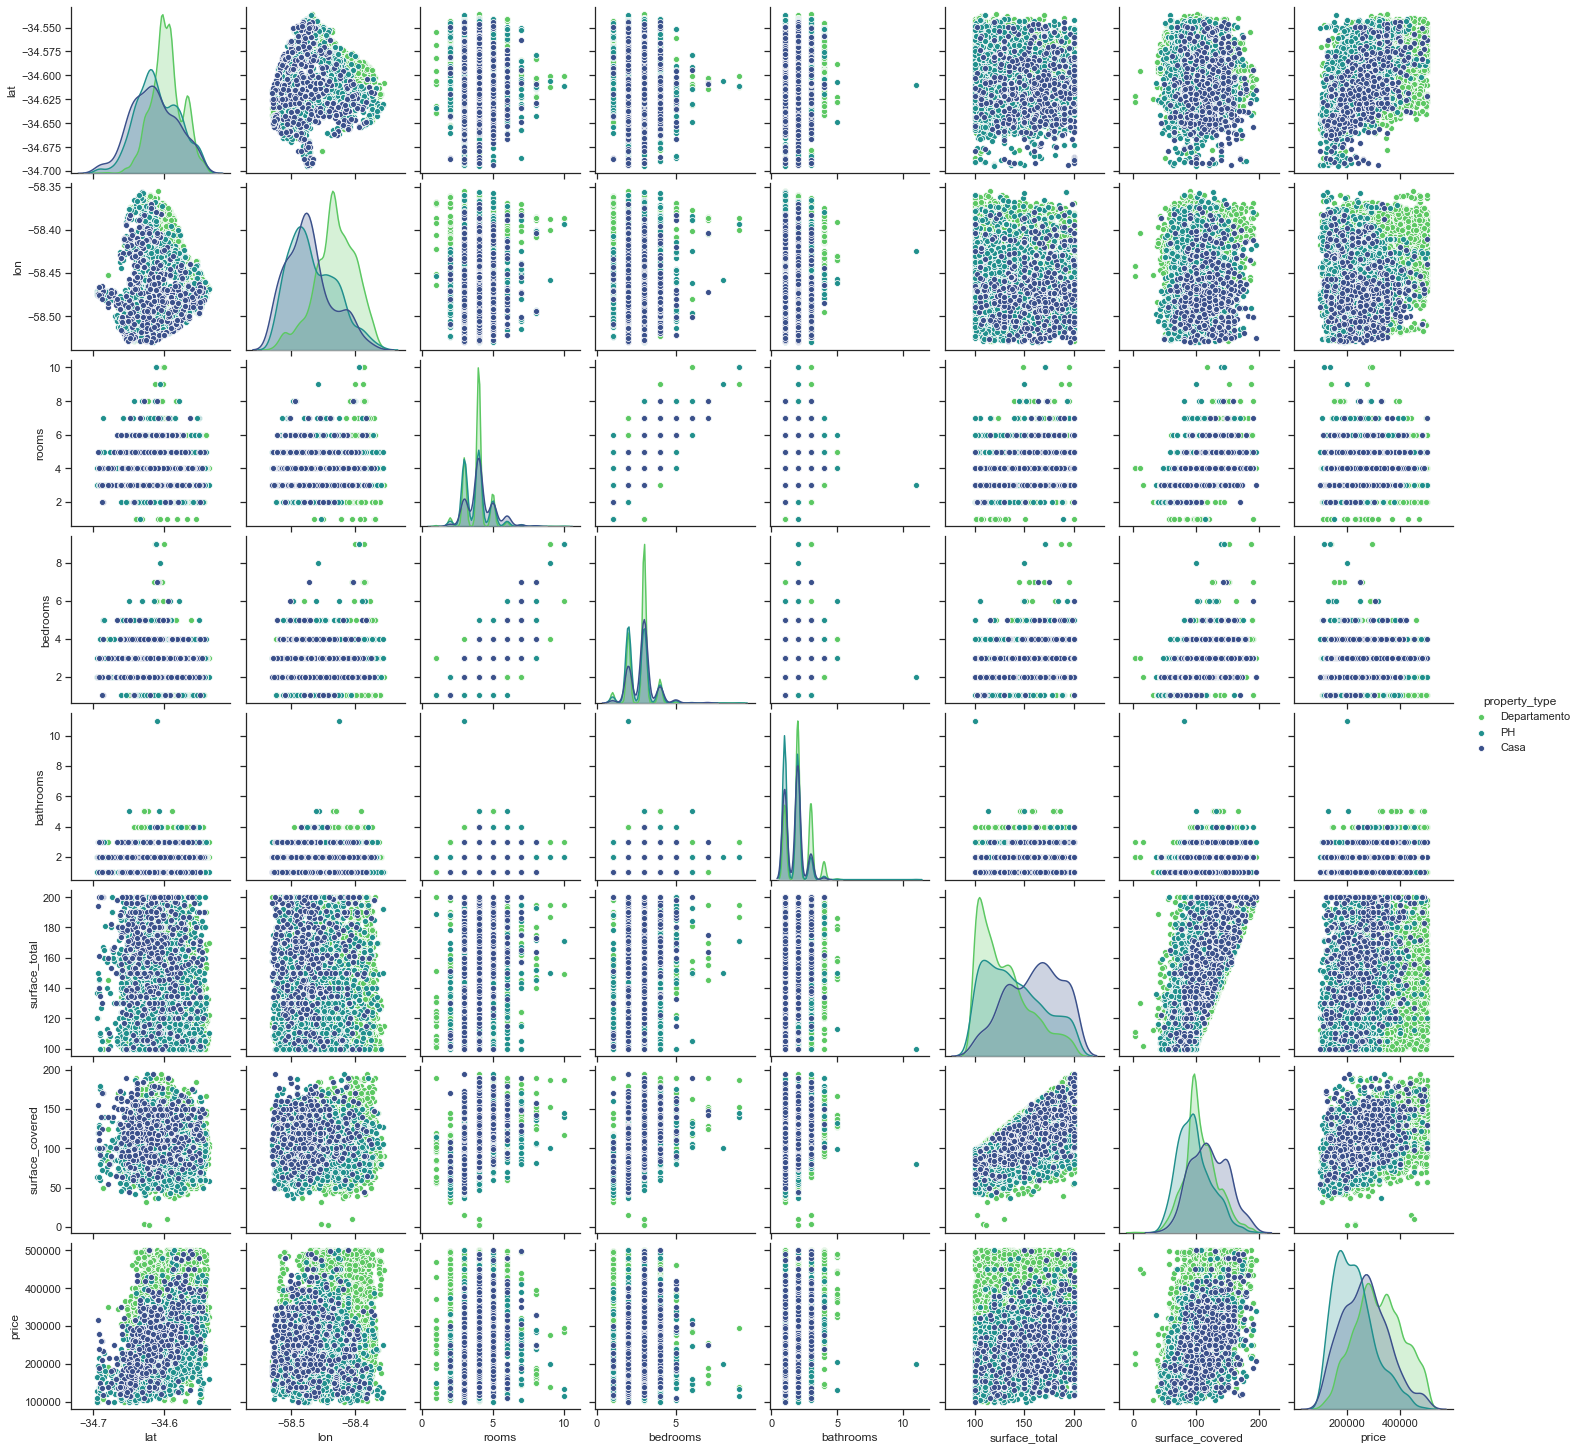

In [180]:
sns.set()
sns.set(style="ticks")
sns.pairplot(graficas2, hue="property_type", palette="viridis_r", diag_kind="kde", height=2.5)

**Conclusión:**

Teniendo en cuenta la naturaleza del negocio que estamos analizando y las premisas mencionadas al comienzo respecto a lo que se considera que son los principales elementos que mueven el precio en este negocio, seleccionaremos la última fila de gráficas, es decir aquellas en las que se compara el precio de manera individual con cada uno de los demás componentes, a efectos de entender mejor su comportamiento por tipo de inmueble, excluyendo las gráficas correspondientes a Latitud y Longitud, dado que éstas variables se comportan como datos que en ésta parte del análisis, no ayudan mucho en las conclusiones.

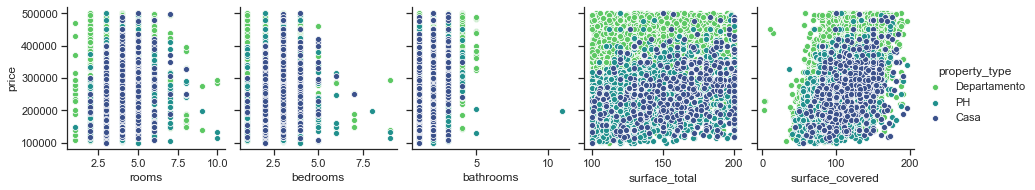

In [181]:
# Tomamos un fragmento del pairplot para visualizar mejor la relación del Precio respecto a algunas viariables
sns.set()
sns.set(style="ticks")
sns.pairplot(
    graficas2,
    x_vars=["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"],
    y_vars=["price"], hue="property_type", palette="viridis_r")

**Conclusión:**

Como era de esperarse, definitivamente existe una relación importante entre el precio y las demás variables como el área total (surface_total), área construída (surface_covered), ambientes (rooms), habitaciones (bedrooms) y baños (bathrooms), aunque realmente la mayor diversidad de datos para analizar en profundidad, se encuentran en las dos últimas gráficas donde se observa la relación precio-área.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

* Antes de hacer el análisis de las correlaciones se realizará un filtro diferente al que se venía utilizando, con el objetivo de tener la mayor cantidad de datos y poder visualizar mejor las relaciones de las variables. Para esto se filtra el Área Total entre 20 mts2 y 1000 mts2. Para el caso de la variable precio se filtra entre USD 70.000 y USD 4.000.000. Así mismo se descartan las propiedades en las que el área construida sea mayor al área total.

In [182]:
# Se hace filtro teniendo en cuenta los parámetros ya mencionados

pto7= s[(s["surface_total"]>=20) & (s["surface_total"]<= 1000)&(s["price"]>=70000)&
            (s["price"]<=4000000)]

print("Tamaño del dataset resultante:", pto7.shape)

Tamaño del dataset resultante: (80386, 19)


In [183]:
# Se verifica cuántos inmuebles presentan inconsistencia

inc2 = pto7.shape[0]-sum(pto7["surface_total"]>pto7["surface_covered"])
print("Total inmuebles con inconsistencia:", inc2)

Total inmuebles con inconsistencia: 24561


In [184]:
# Se descartan aquellas propiedades con inconsistencia

pto7f = pto7[pto7["surface_total"] > pto7["surface_covered"]]

In [185]:
# Se verifica si realmente se eliminaron las propiedades con inconsistencia

sin_inc2 = pto7f.shape[0]- sum(pto7f["surface_total"]>pto7f["surface_covered"])
print("Total inmuebles con inconsistencia:", sin_inc2)

Total inmuebles con inconsistencia: 0


In [186]:
print("Tamaño del nuevo dataset sin inconsistencias:", pto7f.shape)

Tamaño del nuevo dataset sin inconsistencias: (55825, 19)


* Con los nuevos datos, se realiza un Mapa de Calor con el propósito de analizar las correlaciones, descartando del dataset las columnas `lon` y `lat`, puesto que se considera que al tratarse de coordenadas, estas no son variables que representen utilidad en el análisis, al menos en ésta parte del proceso. 

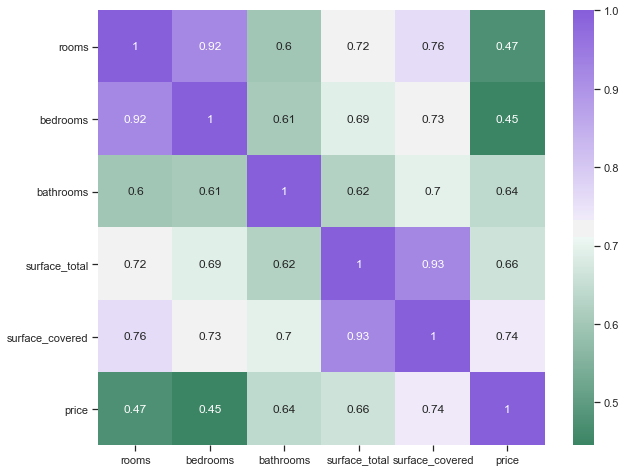

In [187]:
# Se seleccionan las variables deseadas, se calcula la correlación y luego se hace un mapa de calor.

dcorr = pto7f.loc[:, "rooms":"price"]
f, ax = plt.subplots(figsize=(10, 8))
corr = dcorr.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(150, 275, as_cmap=True), annot=True)

**Conclusiones:**

* Las variables con alta correlación son:
  * Surface_covered (área construída) y surface_total (área total) con una correlación igual a 0,93. 
  * Rooms (ambientes) y bedrooms (habitaciones) con una correlación igual a 0,92. Esta correlación es normal ya que es lógico que en la medida en que un inmueble tenga más ambientes, tendrá también más habitaciones. 
  

* Las variables con correlación media son: 
  * Rooms y surface_covered con una correlación igual a 0,76. Esta correlación es normal ya que es lógico que en la medida en que un inmueble tenga más área construída, así mismo podrá tener más ambientes.
  * Surface_covered y bedrooms con una correlación igual a 0.73. Esta correlación es normal ya que es lógico que en la medida en que un inmueble tenga más área construída, así mismo podrá tener más habitaciones.


* Las mejores variables para predecir el precio son: `surface_covered`, `surface_total` y `bathrooms`. Sin embargo, estos resultados cambian de manera significativa dependiendo del tipo de propiedad, tal y como se puede apreciar en los siguientes gráficos:

**Gráfica: Relación Precio vs Área Total por Tipo de Propiedad**

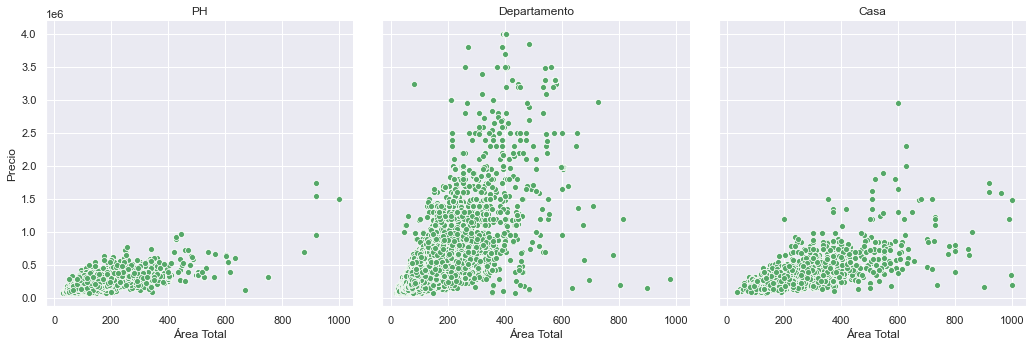

In [188]:
# Se elabora un gráfico de dispersión para la variable Área Total (surface_total) vs Precio por tipo de propiedad.

sns.set()
g = sns.FacetGrid(pto7f,col="property_type")
g.map(sns.scatterplot, "surface_total", "price", color="g")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Área Total", "Precio")
g.fig.set_figheight(6)
g.fig.set_figwidth(15)

**Conclusión:**

El resultado de las gráficas donde se compara el Área Total (surface_total) con el Precio, muestra un comportamiento interesante dependiendo del tipo de inmueble, de la siguiente manera: 

* En primer lugar, los PHs en promedio no superan los USD 750.000 aprox. como precio máximo, independientemente de su área total, donde se ve que la gran mayoría de PHs tienen un área máxima de 400 mts2. 

* En segundo lugar, los Departamentos muestran un comportamiento casi que lineal entre las variables área y precio, es decir que en la medida en que el área total se incrementa, así mismo lo hace el precio, el cual puede llegar a superar los USD 3 millones, mientras que el área total rara vez supera los 600 mts2. 

* En tercer lugar tenemos las casas, las cuales tienen un comportamiento similar a los PHs, en el sentido que tienen un tope de precio que no supera el millón de dólares independientemente del área total, la cual rara vez pasa de los 600 mts2. 


**Gráfica: Relación Precio vs Área Construída por Tipo de Propiedad**

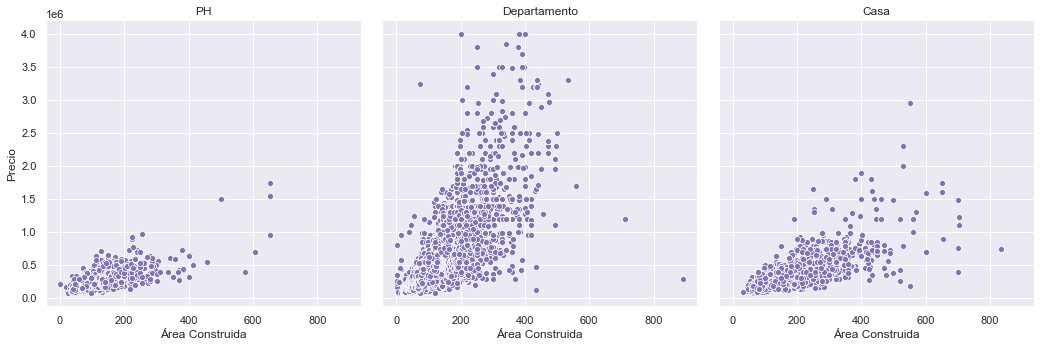

In [189]:
# Se elabora un gráfico de dispersión para la variable Área Construída (surface_covered) vs Precio por tipo de propiedad.

sns.set()
g = sns.FacetGrid(pto7f,col="property_type")
g.map(sns.scatterplot, "surface_covered", "price", color="m")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Área Construida", "Precio")
g.fig.set_figheight(6)
g.fig.set_figwidth(15)

**Conclusión:**

Al elaborar las gráficas donde se compara el Área Construída (surface_covered) con el Precio, los resultados muestran un comportamiento idéntico al observado anteriormente (Área Total o surface_total), por lo tanto las conclusiones son las mismas ya mencionadas. 

**Gráfica: Relación Precio vs Baños por Tipo de Propiedad**

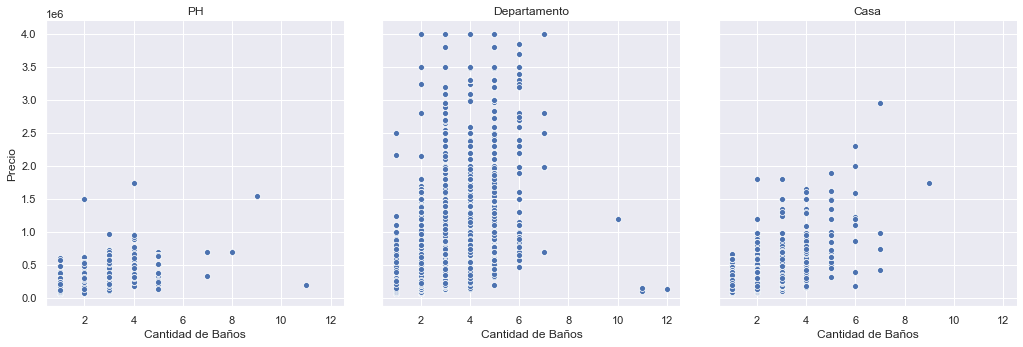

In [190]:
# Se elabora un gráfico de dispersión para la variable Baños (bathrooms) vs Precio por tipo de propiedad.

sns.set()
g = sns.FacetGrid(pto7f,col="property_type")
g.map(sns.scatterplot, "bathrooms", "price", color="b")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Cantidad de Baños", "Precio")
g.fig.set_figheight(6)
g.fig.set_figwidth(15)

**Conclusión:**

El resultado de las gráficas donde se compara la relación entre el precio y la cantidad de baños (bathrooms) muestra lo siguiente:

* En general para los tres tipos de inmuebles, la cantidad máxima de baños, no supera los 6 en total.

* En el caso de los PHs, si bien el precio se afecta en función de la cantidad de baños, su valor total rara vez supera los USD 750.000.

* En el caso de los Departamentos y las Casas, se observa que el comportamiento del precio es lineal y creciente con respecto a la cantidad de baños (sin superar el total de 6 baños máximo).

* Realmente no se percibe que el precio de los inmuebles tenga una relación directa con la cantidad de baños, sino que ésta última es consecuencia del área total del inmueble, es decir, que es normal que un inmueble en la medida en que aumente su área, requiera más cantidad de baños. Conociendo el resultado de gráficas anteriores donde se compara el precio con el área total, se considera que realmente la variable "baños" no es la que mueve como tal el precio, sino que esta variable es una consecuencia del área total de los inmuebles.

## Parte 2.1: Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


**Solución Desafío:**

**Pregunta:** ¿Cuál es el impacto real que tiene sobre el precio de venta las variables: ubicación, área construida y tipo de inmueble (Casa, PH, Departamento)?

Se plantea esta pregunta, porque hasta ahora no se ha considerado la ubicación (barrio donde se encuentran ubicados los inmuebles) como un elemento comparativo de análisis, ni cómo dicha variable afecta el precio, según su área y tipo de inmueble. Tal y como se mencionó al comienzo de este informe, se considera que la ubicación de los inmuebles es una de las variables más fuertes que deberían considerarse dentro del análisis. 

**Gráfica de Dispersión por Tipo de Propiedad: Precios / Barrios**

En primer lugar se realizará una gráfica de dispersión en la cual se pueda observar el comportamiento general de los precios de cada tipo de propiedad dependiendo del barrio.

Text(0, 0.5, 'Precio')

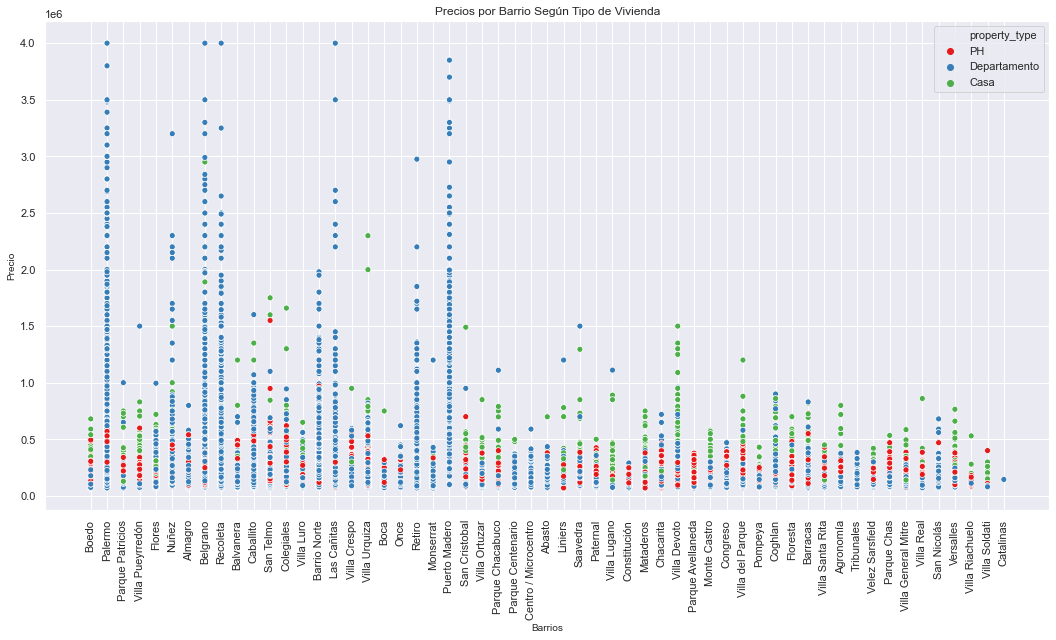

In [191]:
plt.figure(figsize = (18,9))
sns.scatterplot(data=pto7f, x="l3", y="price", hue="property_type", palette="Set1")
plt.xticks(rotation=90)
plt.title("Precios por Barrio Según Tipo de Vivienda", fontsize=12)
plt.xlabel("Barrios", fontsize=10)
plt.ylabel("Precio", fontsize=10)

**Conclusión:**

La gráfica muestra que definitivamente los precios están fuertemente influenciados dependiendo del barrio en el cual estén ubicados los inmuebles. Como es natural en el mercado inmobiliario, hay barrios con rangos de precios altos, otros de precio medio y otros de precio bajo. 

Teniendo en cuenta la información de la base de datos correspondiente exclusivamente a los inmuebles publicados en Properati, se observa que los barrios en los cuales los precios son más altos en Capital Federal, serían Palermo, Belgrano, Recoleta, Barrio Norte y Puerto Madero. También se observa de manera preliminar, que existen barrios donde predominan los Departamentos como tipo de inmueble más comunes dentro de los publicados en Properati y otros donde predominan las Casas y los PHs. Ahora bien, sería importante poder visualizar esta gráfica pero de manera separada por tipo de inmueble, para lo cual se realizarán otras gráficas más adelante.

**Gráfica de Dispersión para Departamentos: Precios / Barrios**

Según lo mencionado anteriormente, se realizará una gráfica de dispersión en la cual se pueda observar el comportamiento general de los precios exclusivamente para los departamentos, dependiendo del barrio.

Text(0, 0.5, 'Precio')

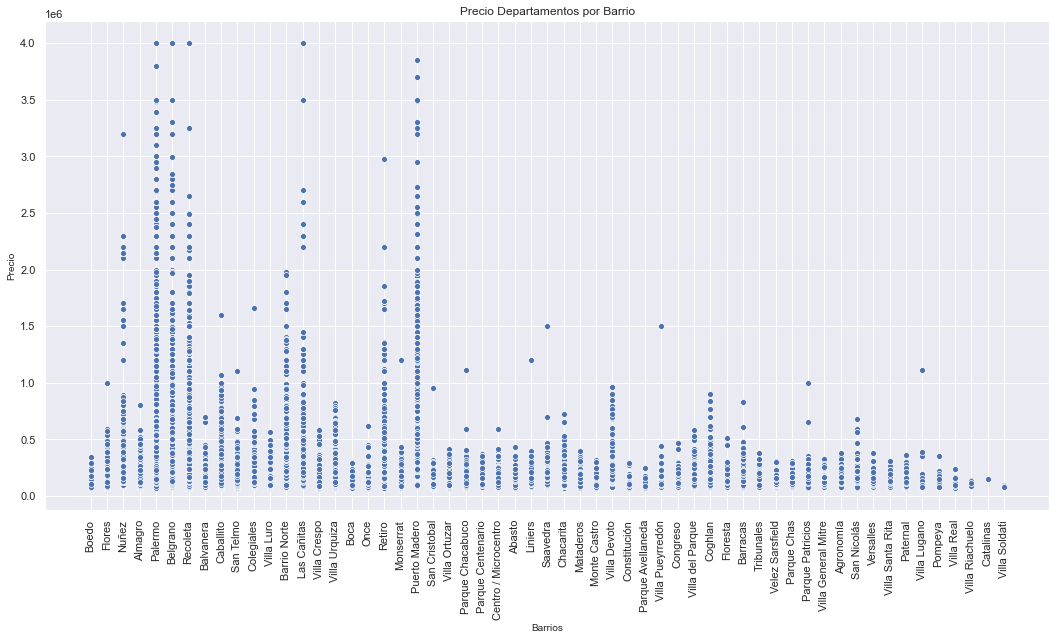

In [192]:
datos_departamento = pto7f[pto7f["property_type"].isin(["Departamento"])]
plt.figure(figsize = (18,9))
sns.scatterplot(data=datos_departamento, x="l3", y="price",color="b")
plt.xticks(rotation=90)
plt.title("Precio Departamentos por Barrio", fontsize=12)
plt.xlabel("Barrios", fontsize=10)
plt.ylabel("Precio", fontsize=10)

**Conclusión:**

Teniendo en cuenta la información de la base de datos correspondiente exclusivamente a los Departamentos publicados en Properati, se observa que existe una correlación entre el resultado de la gráfica general mostrada anteriormente, la cual incluía todos los tipos de inmuebles, con la presente gráfica, en el sentido de que los barrios en los cuales los precios de los Departamentos son más altos en Capital Federal, serían Palermo, Belgrano, Recoleta, Barrio Norte y Puerto Madero. 

**Gráfica de Dispersión para PHs: Precios / Barrios**

Según lo mencionado anteriormente, se realizará una gráfica de dispersión en la cual se pueda observar el comportamiento general de los precios exclusivamente para los PHs, dependiendo del barrio.

Text(0, 0.5, 'Precio')

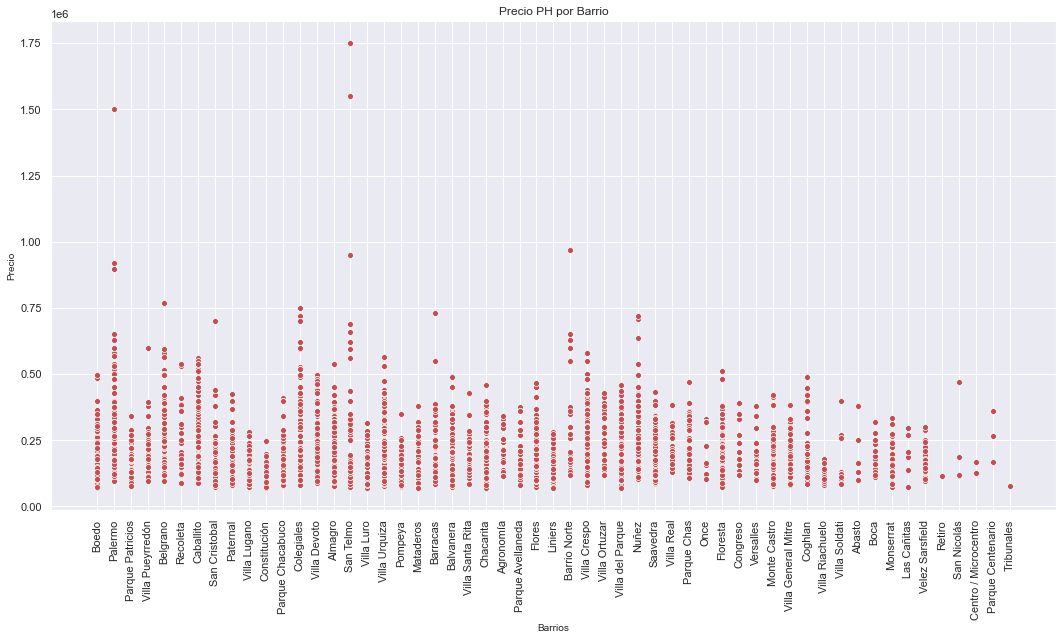

In [193]:
datos_ph = pto7f[pto7f["property_type"].isin(["PH"])]
plt.figure(figsize = (18,9))
sns.scatterplot(data=datos_ph, x="l3", y="price",color="r")
plt.xticks(rotation=90)
plt.title("Precio PH por Barrio", fontsize=12)
plt.xlabel("Barrios", fontsize=10)
plt.ylabel("Precio", fontsize=10)

**Conclusión:**

Teniendo en cuenta la información de la base de datos correspondiente exclusivamente a los inmuebles publicados en Properati, se observa que los barrios en los cuales los precios de los PHs son más altos en Capital Federal, sin que dicho precio supere los USD 500.000 aproximadamente, serían Palermo, Belgrano, Caballito, Colegiales, Villa Devoto, Villa Crespo y Nuñez. En cuanto al resto de barrios, los precios están están en un promedio aprox. de USD 200.000 a USD 350.000.

**Gráfica de Dispersión para Casas: Precios / Barrios**

Según lo mencionado anteriormente, se realizará una gráfica de dispersión en la cual se pueda observar el comportamiento general de los precios exclusivamente para las Casas, dependiendo del barrio.

Text(0, 0.5, 'Precio')

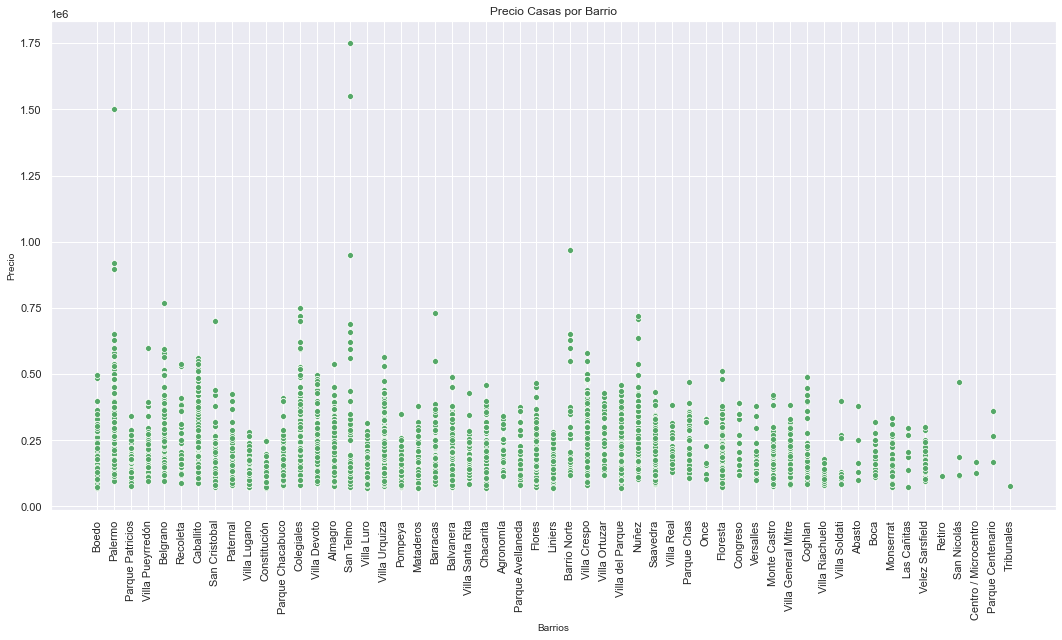

In [194]:
datos_casas = pto7f[pto7f["property_type"].isin(["Casa"])]
plt.figure(figsize = (18,9))
sns.scatterplot(data=datos_ph, x="l3", y="price",color="g")
plt.xticks(rotation=90)
plt.title("Precio Casas por Barrio", fontsize=12)
plt.xlabel("Barrios", fontsize=10)
plt.ylabel("Precio", fontsize=10)

**Conclusión:**

Teniendo en cuenta la información de la base de datos correspondiente exclusivamente a los inmuebles publicados en Properati, se observa que los barrios en los cuales los precios de las casas son más altos en Capital Federal, sin que dicho precio supere los USD 500.000 aproximadamente, serían Palermo, Belgrano, Caballito, Colegiales, Villa Devoto, Villa Crespo y Villa Urquiza. En cuanto al resto de barrios, los precios están están en un promedio aprox. de USD 200.000 a USD 300.000.

**Gráfica de Dispersión considerando Barrios, Área Total, Tipo de Inmueble y Precio**

Como ya se ha venido observando, existe una marcada relación entre los precios de los inmuebles y su área total, dependiendo del tipo de inmueble y del barrio donde estén ubicados. Por esa razón es importante poder contar con algunas gráficas en las que se pueda visualizar de manera independiente su comportamiento. 

Teniendo en cuenta que son muchos los barrios existentes, se preparará un set de gráficas que incluyan las variables mencionadas para aquellos barrios donde Properati tiene inmuebles con el mayor rango de precios posible, considerando los 3 tipos de inmuebles. 

Estos barrios suman 12 y son los siguientes: Palermo, Belgrano, Recoleta, Barrio Norte, Retiro, Puerto Madero, Villa Devoto, Caballito, Colegiales, Villa Crespo, Núñez y Las Cañitas.

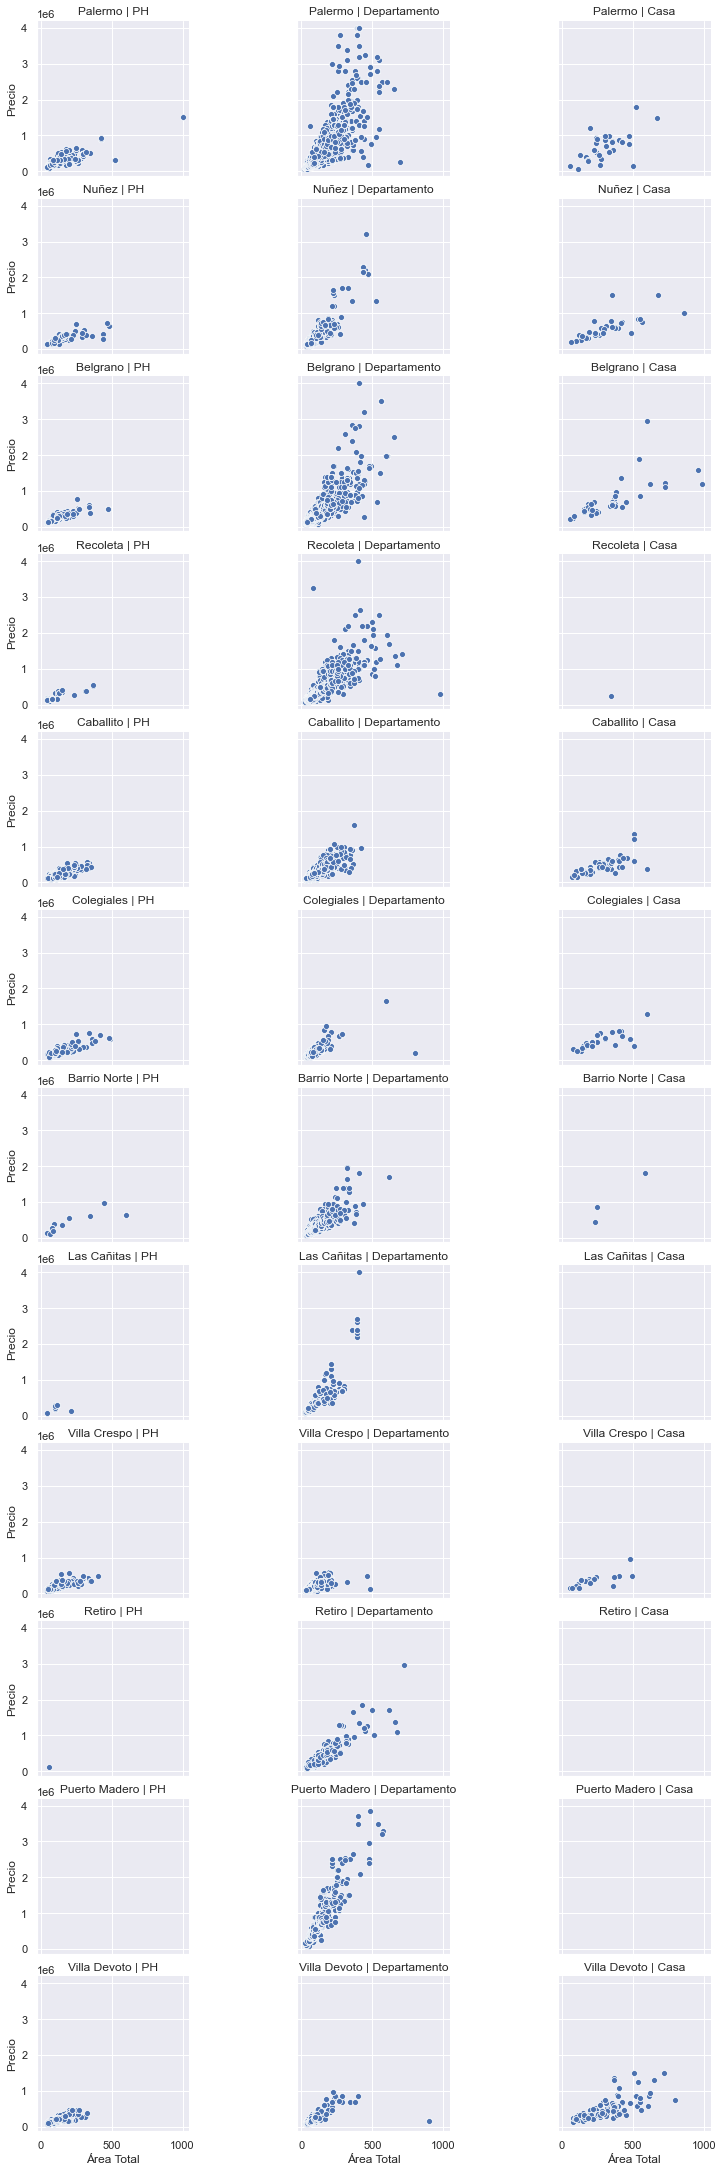

In [195]:
sns.set()
    
gr=pto7f[(pto7f.l3.isin(["Palermo", "Belgrano", "Recoleta", "Barrio Norte", "Retiro", "Puerto Madero", "Villa Devoto", 
                         "Caballito", "Colegiales", "Villa Crespo", "Nuñez", "Las Cañitas"]))]

g = sns.FacetGrid(gr, col="property_type", row="l3")
g.map_dataframe(sns.scatterplot, x="surface_total", y="price")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set_axis_labels("Área Total", "Precio")
g.fig.set_figheight(30)
g.fig.set_figwidth(10)
g.add_legend()

**Conclusión:**

Definitivamente luego de analizar de manera individual las anteriores gráficas, las conclusiones son contundentes. Los precios de los inmuebles publicados en Properati, siempre dependerán claramente en su orden de las siguientes variables: primero del barrio donde esté ubicado el inmueble, segundo del área total del inmueble y tercero, del tipo de inmueble.

Existen barrios donde para el caso de los Departamentos, el precio se incrementa de manera gradual y proporcional en la medida en que el área del inmueble sube. Este comportamiento se puede comprobar fácilmente al observar las gráficas para los barrios como Palermo, Belgrano, Recoleta y Puerto Madero. 

También existen barrios donde para el caso de las Casas, el precio se puede llegar a incrementar de manera gradual pero no proporcional con respecto al área. En estos barrios se puede observar que además existe un "tope" de precio, ya que independientemente del área total, el precio nunca superará ese límite. Dichos barrios son por ejemplo: Palermo, Nuñez, Caballito y Villa Devoto.

Por su parte, los precios de los PHs tienen un comportamiento casi que igual en la mayoría de barrios de Capital Federal, ya que los precios rara vez pasan de USD 500.000 y el área tampoco supera los 250-300 mts2.

## Parte 3: Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [1]:
# Se hace la importación de todas las librerias que se van a utilizar:

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_poisson_deviance, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Se cargan nuevamente los datos y se seleccionan los siguientes tipos de inmuebles de Capital Federal: Departamento, PH y Casa

data2 = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
properati2 = pd.DataFrame(data2)
p3= properati2[(properati2.l2 == 'Capital Federal') & (properati2.property_type.isin(['Departamento','Casa','PH']))]
print("Tamaño del dataset:", p3.shape)

Tamaño del dataset: (91485, 19)


In [3]:
# Se seleccionan las propiedades en las que el área total esté entre 15 mts2 y 1000 mts2 y cuyo precio sea menor a USD 4000000:

pml= p3[(p3["surface_total"]>=15) & (p3["surface_total"]<= 1000)&(p3["price"]<=4000000)]
print("Tamaño del dataset:", pml.shape)

Tamaño del dataset: (82373, 19)


In [4]:
# Se seleccionan solamente las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price:

pmlc= pml.loc[:, "rooms":"price"]
pmlc.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [5]:
# Se revisan las columnas para determinar cuáles tienen valores faltantes:

print("Columnas con Valores Faltantes")
print(pmlc.isna().sum())

Columnas con Valores Faltantes
rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
dtype: int64


In [6]:
# Se descartan las instancias con valores faltantes:

pmlf=pmlc.dropna()
print("Tamaño Nuevo Dataset")
pmlf.shape

Tamaño Nuevo Dataset


(81019, 6)

* Se realiza de nuevo un mapa de calor para revisar cómo son las correlaciones de las variables con estos nuevos datos.  

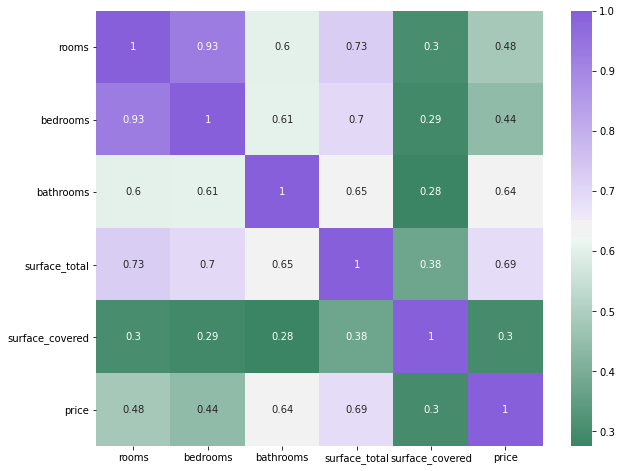

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
corr = pmlf.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(150, 275, as_cmap=True), annot=True)

**Conclusiones:**

* Las variables con alta correlación entre ellas son:
  * Rooms y bedrooms con una correlación igual a 0,93. Esta correlación es normal ya que es lógico que en la medida en que un inmueble tenga más ambientes, tendrá también más habitaciones.
  

* Las variables con correlación media son:
  * Surface_total y rooms con una correlación igual a 0,73. Al igual que el anterior, este resultado también es lógico ya que en la medida en que el inmueble tenga más área, podrá tener más ambientes.
  * Surface_total y bedrooms con una  correlación igual a 0,70. Misma explicación.


* La mejor variable para predecir el precio es: `surface_total` con una correlación igual a 0,69. Ya después tenemos los `bathrooms`con 0,64, pero obviamente esto es una consecuencia del tamaño de los inmuebles, es decir, que está directamente ligado con la `surface_total`.

### Modelo Machine Learning

1. Se separan los atributos elegidos primero en `X` para las features o características y segundo en `y` para la variable target u objetivo. Teniendo en cuenta que en el actual dataset no se incluyen las variables "Barrio" y "Tipo de Propiedad", que según todos los análisis anteriores concluían que son variables clave para la determinación del precio, los modelos de Machine Learning que se correrán a continuación, se basarán en la única variable disponible con impacto relevante en el precio, que es `surface_total`.

In [8]:
X = pmlf[["surface_total"]].values
y = pmlf.price

2. Tanto para `X`como para `y` se distribuirán los datos de la siguiente manera: un 70% para el conjunto de entrenamiento (`X_train` y `y_train`) y un 30% para el conjunto de evaluación o test (`X_test`y `y_test`).

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 1) (56713,) (24306, 1) (24306,)


3. **Generación y evaluación de un modelo de Benchmark:**

Para este punto se utilizará la función `DummyRegressor` de la librería Scikit-Learn. Este regresor sirve como una base simple de comparación con otros modelos de regresión reales. Este estimador no aprende ningún patrón de las características, solo hace predicciones utilizando reglas simples. Para cumplir con la verificación, el modelo real debería resultar en un mejor rendimiento que el modelo de referencia.

   3.1. Para empezar, se crea un diccionario que imprime algunas métricas de evaluación para evaluar el rendimiento del modelo y se preseleccionan las siguientes métricas con el propósito de eligir la más adecuada al final del ejercicio: `r2_score`, `mean_squared_error`, `mean_absolute_error`y `mean_poisson_deviance`.

In [10]:
def metricas_evaluacion(y, y_pred):
    results_dict = {'r2_score': r2_score(y, y_pred),
                    'explained_variance': explained_variance_score(y, y_pred),
                    'neg_mean_squared_error': mean_squared_error(y, y_pred),
                    'neg_mean_absolute_error': mean_absolute_error(y, y_pred),
                    'neg_mean_poisson_deviance': mean_poisson_deviance(y, y_pred)}
    return results_dict

   3.2. El estimador `DummyRegressor` ofrece algunas reglas posibles (llamadas estrategias), que se pueden usar para determinar las predicciones de la clase de referencia. A continuación, se describen brevemente y se presenta el código correspondiente.

   * Estrategia "Constant": Siempre predice un valor constante proporcionado por el usuario.

In [11]:
dummy_reg = DummyRegressor(strategy='constant', constant=1)
dummy_reg.fit(X_train, y_train)
y_pred = dummy_reg.predict(X_test)
print(metricas_evaluacion(y_test, y_pred))

{'r2_score': -0.7627938793209506, 'explained_variance': 0.0, 'neg_mean_squared_error': 161086368794.12634, 'neg_mean_absolute_error': 264017.20476425573, 'neg_mean_poisson_deviance': 6252258.205054631}


  * Estrategia "Media": Siempre predice la media del conjunto de entrenamiento.

In [12]:
dummy_reg = DummyRegressor(strategy='mean')
dummy_reg.fit(X_train, y_train)
y_pred = dummy_reg.predict(X_test)
print(metricas_evaluacion(y_test, y_pred))

{'r2_score': -1.3479944651617615e-06, 'explained_variance': 0.0, 'neg_mean_squared_error': 91381407564.06099, 'neg_mean_absolute_error': 160678.53306831658, 'neg_mean_poisson_deviance': 188406.23122303773}


  * Estrategia “Median”: Siempre predice la mediana del conjunto de entrenamiento.

In [13]:
dummy_reg = DummyRegressor(strategy='median')
dummy_reg.fit(X_train, y_train)
y_pred = dummy_reg.predict(X_test)
print(metricas_evaluacion(y_test, y_pred))

{'r2_score': -0.07724840791527421, 'explained_variance': 0.0, 'neg_mean_squared_error': 98440343114.40381, 'neg_mean_absolute_error': 140481.42388710607, 'neg_mean_poisson_deviance': 222639.6192587304}


  * Estrategia “Quantile”: Siempre predice un cuantil específico del conjunto de entrenamiento, para lo cual se emplea el parámetro de `quantile`. Se escogió como valor del parámetro `quantile` 0.0 (representa el error mínimo), ya que 0.5 representa la Mediana y ésta ya fue calculada en el apartado anterior.

In [14]:
dummy_reg = DummyRegressor(strategy='quantile', quantile=0.0)
dummy_reg.fit(X_train, y_train)
y_pred = dummy_reg.predict(X_test)
print(metricas_evaluacion(y_test, y_pred))

{'r2_score': -0.7285232905136212, 'explained_variance': 0.0, 'neg_mean_squared_error': 157954678372.3648, 'neg_mean_absolute_error': 258018.20476425573, 'neg_mean_poisson_deviance': 1670595.672769389}


4. Habiendo experimentado con las 4 estrategias descritas anteriormente para crear un modelo de referencia, a continuación se correrán los modelos solicitados, que son dos modelos de regresión: uno de Vecinos más Cercanos y otro de Árboles de Decisión, evaluando si como consecuencia superan a los resultados del Modelo de Benchmark.

In [15]:
# Modelo de Árboles de Decisión

tree_regressor = DecisionTreeRegressor(max_depth=7, random_state=42)
tree_regressor.fit(X_train, y_train)
y_pred = tree_regressor.predict(X_test)
print(metricas_evaluacion(y_test, y_pred))

{'r2_score': 0.5344641045866214, 'explained_variance': 0.5344653526844171, 'neg_mean_squared_error': 42541268049.07614, 'neg_mean_absolute_error': 92307.58709023576, 'neg_mean_poisson_deviance': 58791.15736895474}


In [16]:
# Modelo de Vecinos más Cercanos

knn_regressor = KNeighborsRegressor(n_neighbors=9)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
print(metricas_evaluacion(y_test, y_pred))

{'r2_score': 0.5247461831290913, 'explained_variance': 0.5247633775535283, 'neg_mean_squared_error': 43429304193.39443, 'neg_mean_absolute_error': 94969.35457637344, 'neg_mean_poisson_deviance': 62463.15801064752}


   4.1. A continuación se elaborarán las curvas de validación de los dos modelos para revisar los hiperparámetros que se utilizarán en cada modelo:

* **Curva de validación Modelo Vecinos más Cercanos**

In [17]:
# Curva de validación Modelo Vecinos más Cercanos

from sklearn.model_selection import validation_curve
#le indicamos la lista de k's para testear el hiperparametro
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

train_prec, eval_prec = validation_curve(estimator=knn_regressor, X=X_train,
                                        y=y_train, param_name='n_neighbors',
                                        param_range=k_vecinos, cv=5)

train_mean = np.mean(train_prec, axis=1)
train_std = np.std(train_prec, axis=1)
test_mean = np.mean(eval_prec, axis=1)
test_std = np.std(eval_prec, axis=1)

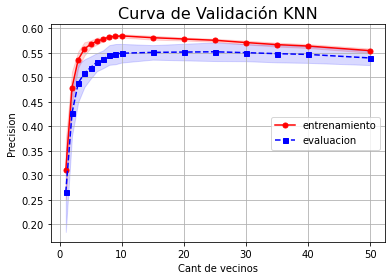

In [18]:
# Graficamos las curvas

plt.plot(k_vecinos, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(k_vecinos, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(k_vecinos, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(k_vecinos, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.legend(loc='center right')
plt.title("Curva de Validación KNN", fontsize=16)
plt.xlabel('Cant de vecinos')
plt.ylabel('Precision')
plt.show()

* **Curva de validación Modelo Árboles de Decisión**

In [19]:
# Curva de Validación Modelo Árboles de Decisión 

from sklearn.model_selection import validation_curve

max_depths = [1,2,3,4,5,6,7,8,9,10]
train_prec, eval_prec = validation_curve(estimator=tree_regressor, X=X_train,
                                        y=y_train, param_name='max_depth',
                                        param_range=max_depths, cv=5)

train_mean = np.mean(train_prec, axis=1)
train_std = np.std(train_prec, axis=1)
test_mean = np.mean(eval_prec, axis=1)
test_std = np.std(eval_prec, axis=1)

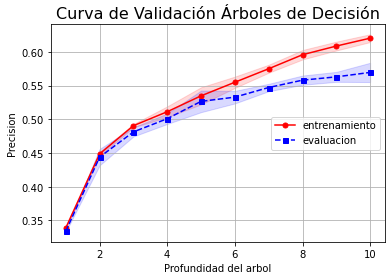

In [20]:
# Graficamos las curvas

plt.plot(max_depths, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(max_depths, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(max_depths, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(max_depths, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.legend(loc='center right')
plt.title("Curva de Validación Árboles de Decisión", fontsize=16)
plt.xlabel('Profundidad del arbol')
plt.ylabel('Precision')
plt.show()

**Conclusiones:** 

* Si bien la métrica explained_variance arroja casi el mismo resultado que r2_score, para efectos de la evaluación de los Modelos se decidió elegir esta última (r2_score), ya que aunque ambas métricas son parecidas, particularmente el r2_score supone que los cambios en la variable dependiente `X` se deben a una relación lineal con la variable independiente `y`, supuesto que no tiene la métrica explained_variance. De acuerdo con lo anterior y teniendo en cuenta los estudios realizados en el Análisis Exploratorio de Datos, la relación entre el precio y área total era prácticamente lineal.

* Al analizar las métricas entre los dos modelos solicitados (Árboles de Decisión y Vecinos más Cercanos) se observan diferencias leves, sin embargo, el Modelo de Vecinos más Cercanos arroja un un r2_score levemente inferior al de Árboles de Decisión, razón por lo cual se escogerá éste último. 

* Por otro lado al comparar los dos Modelos solicitados con el Modelo de Benchmark, se observa que dichos Modelos siempre arrojan mejor performance.

* De acuerdo con las curvas de validación, los mejores hiperparámetros son: para el caso de Vecinos más Cercanos es de 9 Vecinos (n_neighbors=9) y para el caso del Modelo de Árboles de Decisión es una Profundidad de 7 (max_depth=7).

5. Se grafican los errores obtenidos con la métrica elegida (r2_score) y se realiza lo siguiente:
  1. Cálculo del r2_score para cada conjunto (train y test).
  1. Gráfico de dispersión de $y$ vs $y_{predicho}$ para el conjunto de test.
  1. Histograma de los errores ($y - y_{predicho}$) para cada conjunto.

Modelo: Árbol de Decisión
R al Cuadrado en Train: 0.5638122251207112
R al Cuadrado en Test: 0.5344641045866214


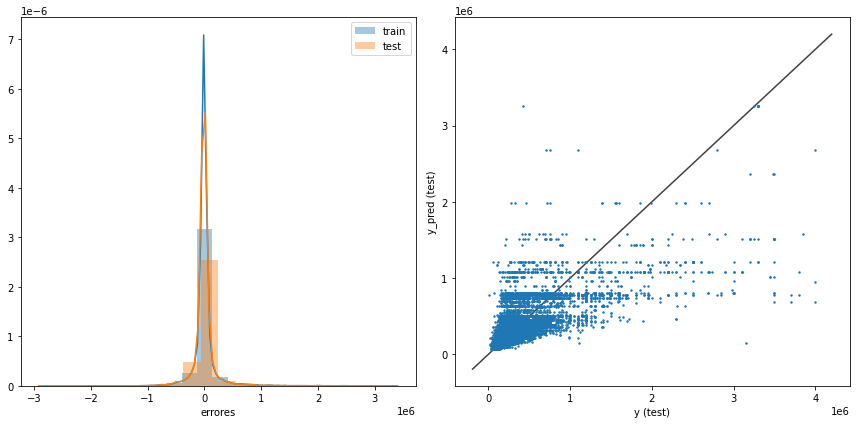

Modelo: Vecinos más cercanos
R al Cuadrado en Train: 0.5838731092846632
R al Cuadrado en Test: 0.5247461831290913


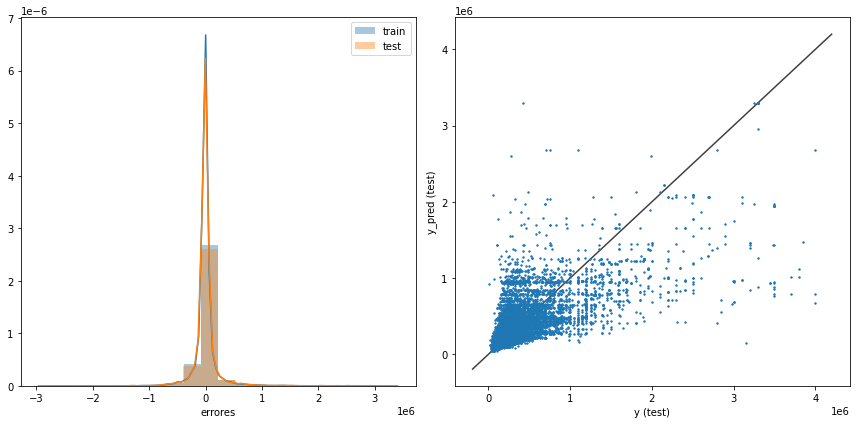

In [21]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    r2_score_train = r2_score(y_train, y_train_pred)
    r2_score_test = r2_score(y_test, y_test_pred)
    print(f'R al Cuadrado en Train: {r2_score_train}')
    print(f'R al Cuadrado en Test: {r2_score_test}')
    
    plt.figure(figsize = (12,6))
    
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()    

**Conclusiones Finales:**

* Teniendo en consideración que los resultados de las métricas de los dos modelos de regresión (Modelo de Vecinos más Cercanos y Modelo de Árboles de Decisión) estuvieron bastante lejanos a 1 (0,5344 y 0,5247), es claro que los valores resultantes no son lo suficientemente confiables para poder predecir los precios. Un resultado del r2 igual a 1 significa un "ajuste lineal perfecto" y un resultado del r2 cercano a cero (0) indica la no representatividad del modelo lineal, por lo tanto los resultados obtenidos de 0,5344 y 0,5247 supone que los Modelos de Regresión no explican de manera contundente la variación total de los precios de los inmuebles. 

* Lo mencionado anteriormente se explica justamente en que dentro de las variables utilizadas, no se incluyeron dos variables clave que son la ubicación de los inmuebles y el tipo de propiedad ya que se solicitó depurar el dataset y trabajar solamente con 6 variables, dentro de las cuales se excluían las dos variables mencionadas. Como se concluyó en el Análisis Exploratorio de Datos, estas dos variables que se solicitaron excluir del análisis, resultan fundamentales a la hora de poder hacer un modelo de predicción de precios preciso, razón por la cual los Modelos de Regresión no tienen un ajuste suficiente para explicar la variación de los precios.

* Como se ha venido explicando y comprobando a lo largo del Análisis Exploratorio, el mercado inmobiliario tiene un comportamiento similar en casi todos los países y ciudades. Se trata de un negocio en el cual las variables principales de decisión de los clientes para definir un precio justo, están fundamentadas primero en la ubicación del inmueble, segundo en su área y tercero en el tipo de inmueble (Departamento, Casa o PH). Otro elemento importante a la hora de determinar el precio de un inmueble es la antiguedad del mismo, sin embargo la base de datos no contempla este indicador que se considera importante. A partir de ahí se puede inferir que las demás variables son meramente complementarias o conexas; por ejemplo, la cantidad de habitaciones (bedrooms) o baños (bathrooms) de un inmueble, siempre tendrán una correlación directa o casi que proporcional con el tamaño del inmueble, lo mismo la cantidad de ambientes (rooms). En otras palabras, si bien se pueden considerar muchos datos como importantes a la hora de determinar el precio de un inmueble, lo cierto es que siempre predominarán las variables Barrio, Área y Tipo de Inmueble.

* La variable "Tipo de Vivienda" tiene un comportamiento muy particular dentro de la base de datos de Properati, toda vez que en lo que respecta a su relación con los precios de venta, es claro que cuando se habla de inmuebles del tipo Casas o PHs, los precios tienen un tope máximo que rara vez supera los USD 500.000 independientemente de su área, ubicación, cantidad de ambientes, habitaciones o baños. Por su parte y contrariamente, los Departamentos siempre tienen un comportamiento del precio creciente en función del área total, que si bien rara vez superan los 500-600 mts2, los precios casi siempre se incrementan proporcionalmente en función de la ubicación y del metraje. El comportamiento anterior es muy marcado y muy relevante a la hora de tasar los inmuebles, por eso una de las conclusiones más importantes es que el elemento "tipo de vivienda" es uno de los 3 aspectos clave a la hora de determinar el valor de los inmuebles.

* Se han elaborado diversas tablas, gráficas y sensibilidades que permiten concluir que la mejor manera de valuar los inmuebles a los Tasadores sobre la base de información de Properati, es definiendo el siguiente órden de resolución de inquietudes:

  * ¿En qué barrio está ubicado el inmueble?
  * ¿Qué área tiene el inmueble?
  * ¿Que tipo de inmueble es? (Departamento, Casa o PH)


    Con estas tres respuestas será fácil determinar los rangos de precios de los inmuebles para los tasadores.

